In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brewer2mpl
import heapq, random
import statistics 
import cdecimal 
import Orange
import pylab as pl

In [ ]:
url1 = "https://s3-ap-southeast-1.amazonaws.com/bigdatatest1/netuser_ygo_01_07.dat"
url2 = "https://s3-ap-southeast-1.amazonaws.com/bigdatatest1/netuser_ygo_08_14.dat"
url3 = "https://s3-ap-southeast-1.amazonaws.com/bigdatatest1/netuser_ygo_15_21.dat"
url4 = "https://s3-ap-southeast-1.amazonaws.com/bigdatatest1/netuser_ygo_22_28.dat"

In [ ]:
wget https://s3-ap-southeast-1.amazonaws.com/bigdatatest1/netuser_ygo_01_07.dat
wget https://s3-ap-southeast-1.amazonaws.com/bigdatatest1/netuser_ygo_08_14.dat
wget https://s3-ap-southeast-1.amazonaws.com/bigdatatest1/netuser_ygo_15_21.dat
wget https://s3-ap-southeast-1.amazonaws.com/bigdatatest1/netuser_ygo_22_28.dat

In [2]:
# Read dat files and save into lists
with open("netuser_ygo_01_07.dat") as input:
    list1 = [line.strip().split('\t') for line in input]
with open("netuser_ygo_08_14.dat") as input:
    list2 = [line.strip().split('\t') for line in input]
with open("netuser_ygo_15_21.dat") as input:
    list3 = [line.strip().split('\t') for line in input]
with open("netuser_ygo_22_28.dat") as input:
    list4 = [line.strip().split('\t') for line in input]
list = list1 + list2 + list3 + list4

In [3]:
# Save lists into Dataframe
from IPython.display import display, HTML
df = pd.DataFrame(data=list, columns=['DATE','USERID','FIRSTGO','DEVID','PCTPV','GOPV','FPPV','MAILPV','SRCHPV','WTHRPV','NEWSPV','FINPV','SPORTSPV','FLICKRPV'])
df.head(3)

,DATE,USERID,FIRSTGO,DEVID,PCTPV,GOPV,FPPV,MAILPV,SRCHPV,WTHRPV,NEWSPV,FINPV,SPORTSPV,FLICKRPV
0,1,130,1,1789,1,102,0,30,19,7,7,7,7,10
1,2,130,0,1789,1,31,0,12,4,2,2,2,2,2
2,3,130,0,1789,1,14,0,5,2,1,1,1,1,1


In [4]:
# Save Dataframe into CSV and read CSV
df.to_csv('births1880.csv',index=False,header=False)
df = pd.read_csv(r'births1880.csv',names=['DATE','USERID','FIRSTGO','DEVID','PCTPV','GOPV','FPPV','MAILPV','SRCHPV','WTHRPV','NEWSPV','FINPV','SPORTSPV','FLICKRPV'])

In [5]:
Sorted = df.sort(['USERID'],ascending=False)
Sorted.head(1)

,DATE,USERID,FIRSTGO,DEVID,PCTPV,GOPV,FPPV,MAILPV,SRCHPV,WTHRPV,NEWSPV,FINPV,SPORTSPV,FLICKRPV
1951206,27,27499994,0,3559,1,38,0,2,4,11,2,2,2,5


In [6]:
# Group Users by Date
grouped_users = df['USERID'].groupby(df['DATE'])
users_per_day = grouped_users.count()
users_per_day

DATE
1     64076
2     65237
3     66665
4     68011
5     69685
6     64125
7     61492
8     68139
9     71209
10    72271
11    70133
12    68970
13    61455
14    57853
15    68021
16    69616
17    69807
18    71882
19    75877
20    67907
21    65060
22    74728
23    76568
24    80599
25    81700
26    80617
27    70997
28    68507
Name: USERID, dtype: int64

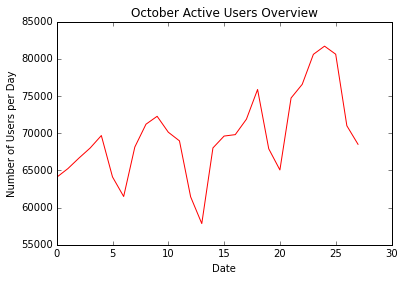

In [7]:
# October Active Users Overview
#box_colors = brewer2mpl.get_map('Set1', 'qualitative', 3).mpl_colors 
plt.plot(users_per_day,color= 'r')
plt.ylabel('Number of Users per Day')
plt.xlabel('Date')
plt.title('October Active Users Overview')    
plt.show()

In [8]:
# Data Overview
df1 = df.ix[:,7:14]
df1.describe()

,MAILPV,SRCHPV,WTHRPV,NEWSPV,FINPV,SPORTSPV,FLICKRPV
count,1951207.000000,1951207.000000,1951207.000000,1951207.000000,1951207.000000,1951207.000000,1951207.000000
mean,21.063910,9.468061,4.013246,4.283745,3.773615,3.814428,6.734654
std,44.160033,23.600611,6.694540,7.729300,8.849063,7.038404,24.815669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,9.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,22.000000,9.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,3536.000000,2779.000000,848.000000,897.000000,2904.000000,817.000000,2739.000000


In [ ]:
mean = df1.mean()
plt.plot(mean,color= 'm')
plt.ylabel('Total GO Page Review')
plt.xlabel('User ID')
plt.title('Number of Total Yahoo! GO Page Review')    
plt.show()

In [9]:
# How well does column X correlate to column Y?
df1.corr()

,MAILPV,SRCHPV,WTHRPV,NEWSPV,FINPV,SPORTSPV,FLICKRPV
MAILPV,1.000000,0.132526,0.200206,0.164530,0.114035,0.149189,0.097907
SRCHPV,0.132526,1.000000,0.281791,0.348428,0.264753,0.320159,0.256924
WTHRPV,0.200206,0.281791,1.000000,0.445340,0.351604,0.434177,0.233493
NEWSPV,0.164530,0.348428,0.445340,1.000000,0.410566,0.534192,0.213372
FINPV,0.114035,0.264753,0.351604,0.410566,1.000000,0.396874,0.132893
SPORTSPV,0.149189,0.320159,0.434177,0.534192,0.396874,1.000000,0.173353
FLICKRPV,0.097907,0.256924,0.233493,0.213372,0.132893,0.173353,1.000000


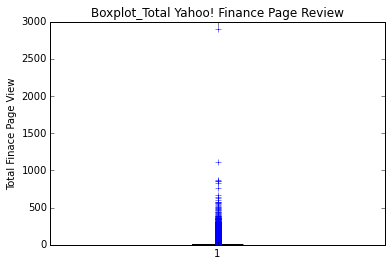

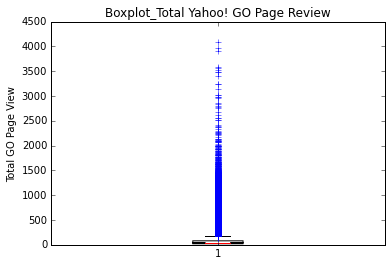

In [11]:
pl.boxplot(df['FINPV'], notch=True, patch_artist=True)
pl.ylabel('Total Finace Page View')
plt.title('Boxplot_Total Yahoo! Finance Page Review') 
pl.show()
pl.boxplot(df['GOPV'], notch=True, patch_artist=True)
pl.ylabel('Total GO Page View')
plt.title('Boxplot_Total Yahoo! GO Page Review') 
pl.show()

1 loops, best of 3: 129 ms per loop


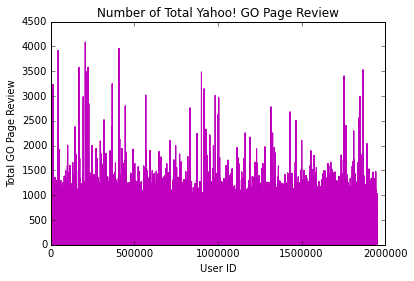

In [12]:
# Yahoo! Total GO Page Review
%timeit plt.plot(df['GOPV'],color= 'm')
plt.ylabel('Total GO Page Review')
plt.xlabel('User ID')
plt.title('Number of Total Yahoo! GO Page Review')    
plt.show()

In [ ]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
    

filtered_FINPV = reject_outliers(df['FINPV'])
filtered_FINPV_Date = filtered_GOPV.groupby(df['DATE']).sum()
# Yahoo! Total Finance Page Review
%timeit plt.plot(filtered_FINPV_Date,color= 'm')
plt.ylabel('Total Finance Page Review')
plt.xlabel('Date')
plt.title('Number of Total Yahoo! Finance Page Review')    
plt.show()


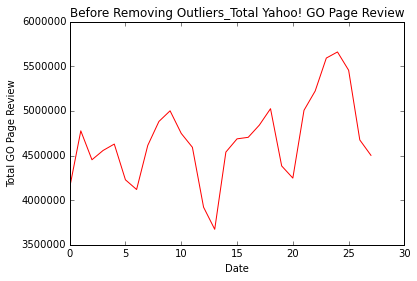

In [14]:
GOPV_Date = df['GOPV'].groupby(df['DATE']).sum()
plt.plot(GOPV_Date,color= 'r')
plt.ylabel('Total GO Page Review')
plt.xlabel('Date')
plt.title('Before Removing Outliers_Total Yahoo! GO Page Review')    
plt.show()

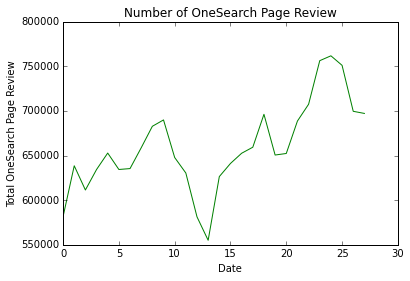

In [15]:
SRCHPV_Date = df['SRCHPV'].groupby(df['DATE']).sum()
plt.plot(SRCHPV_Date,color= 'g')
plt.ylabel('Total OneSearch Page Review')
plt.xlabel('Date')
plt.title('Number of OneSearch Page Review')    
plt.show()

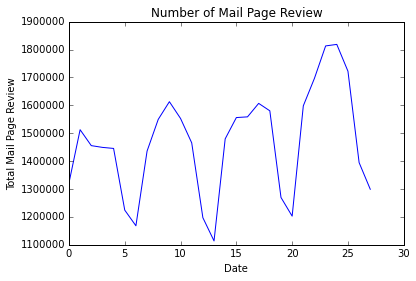

In [16]:
MAILPV_Date = df['MAILPV'].groupby(df['DATE']).sum()
plt.plot(MAILPV_Date,color= 'b')
plt.ylabel('Total Mail Page Review')
plt.xlabel('Date')
plt.title('Number of Mail Page Review')    
plt.show()

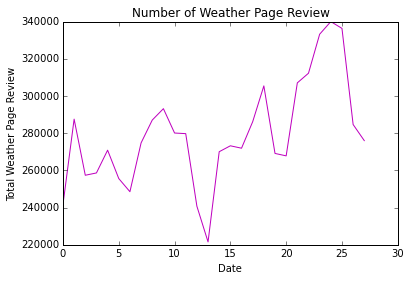

In [17]:
WTHRPV_Date = df['WTHRPV'].groupby(df['DATE']).sum()
plt.plot(WTHRPV_Date,color= 'm')
plt.ylabel('Total Weather Page Review')
plt.xlabel('Date')
plt.title('Number of Weather Page Review')    
plt.show()

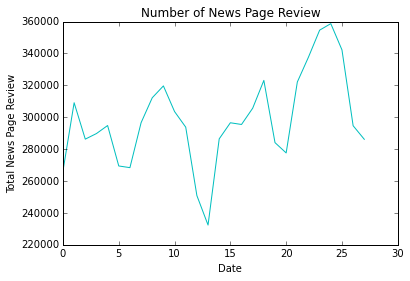

In [18]:
NEWSPV_Date = df['NEWSPV'].groupby(df['DATE']).sum()
plt.plot(NEWSPV_Date,color= 'c')
plt.ylabel('Total News Page Review')
plt.xlabel('Date')
plt.title('Number of News Page Review')    
plt.show()

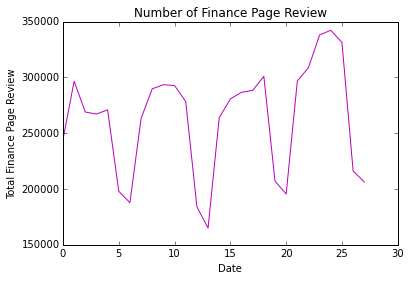

In [19]:
FINPV_Date = df['FINPV'].groupby(df['DATE']).sum()
plt.plot(FINPV_Date,color= 'm')
plt.ylabel('Total Finance Page Review')
plt.xlabel('Date')
plt.title('Number of Finance Page Review')    
plt.show()

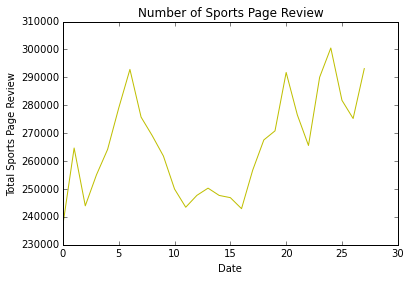

In [20]:
SPORTSPV_Date = df['SPORTSPV'].groupby(df['DATE']).sum()
plt.plot(SPORTSPV_Date,color= 'y')
plt.ylabel('Total Sports Page Review')
plt.xlabel('Date')
plt.title('Number of Sports Page Review')    
plt.show()

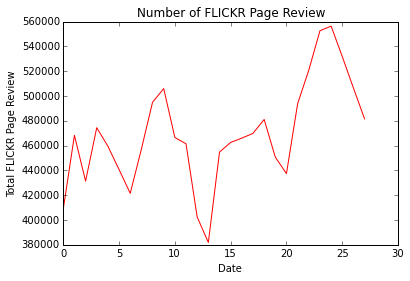

In [21]:
FLICKRPV_Date = df['FLICKRPV'].groupby(df['DATE']).sum()
plt.plot(FLICKRPV_Date,color= 'r')
plt.ylabel('Total FLICKR Page Review')
plt.xlabel('Date')
plt.title('Number of FLICKR Page Review')    
plt.show()

The slowest run took 25.22 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 3.46 ms per loop


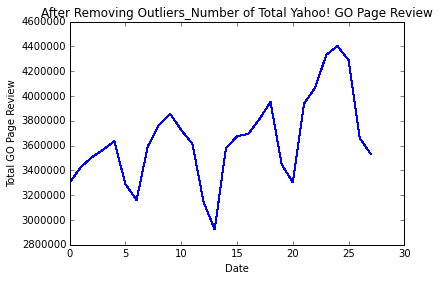

In [22]:
filtered_GOPV = reject_outliers(df['GOPV'])
filtered_GOPV_Date = filtered_GOPV.groupby(df['DATE']).sum()

# Yahoo! Total GO Page Review
%timeit plt.plot(filtered_GOPV_Date,color= 'b')
plt.ylabel('Total GO Page Review')
plt.xlabel('Date')
plt.title('After Removing Outliers_Number of Total Yahoo! GO Page Review')    
plt.show()

1 loops, best of 3: 171 ms per loop


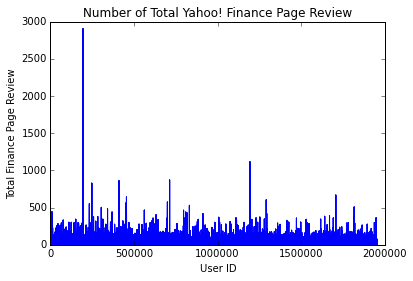

In [ ]:
# Yahoo! Total GO Page Review
%timeit plt.plot(df['FINPV'],color= 'b')
plt.ylabel('Total Finance Page Review')
plt.xlabel('User ID')
plt.title('Number of Total Yahoo! Finance Page Review')    
plt.show()

In [ ]:
# Who are the 5 most active Yahoo! GO Users?
active_GO = df.groupby(['GOPV']).sum()
top5_GO = heapq.nlargest(5,active_GO.index)
top5_GOPV = heapq.nlargest(5,active_GO) 
print top5_GO,top5_GOPV

# Who are the 5 most active Yahoo! GO Mail Users?
active_Mail = df['MAILPV'].groupby(df['USERID']).sum()
top5_Mail = heapq.nlargest(5,active_Mail.index)
top5_MailPV = heapq.nlargest(5,active_Mail) 
print top5_Mail,top5_MailPV

# Who are the 5 most active Yahoo! GO SRCH Users?
active_Srch = df1.groupby(['SRCHPV'],['USERID'])
a = active_Srch.sort(['SRCHPV'],reverse=True)
print type(active_Srch),type(a),type(df['SRCHPV'])

In [ ]:
import Orange.data
data = Orange.data.Table("netuser_ygo.csv")
rules = Orange.associate.AssociationRulesSparseInducer(data, support=0.3)
print "%4s %4s  %s" % ("Supp", "Conf", "Rule")
for r in rules[:5]:
    print "%4.1f %4.1f  %s" % (r.support, r.confidence, r)